In [1]:
import numpy
from matplotlib import pyplot as plot
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline

In [2]:
with open("3.txt") as file:
    data = numpy.array([float(line.split(',')[3]) for line in file])

Проверим гипотезу того, что распределение логистическое.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.logistic.html

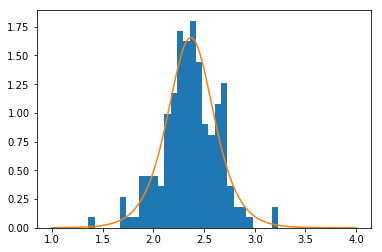

In [3]:
# Посмотрим на гистограмму

plot.hist(data, bins=30, normed=True)
cont_x = numpy.linspace(1, 4, 1000)
loc, scale = stats.logistic.fit(data)
plot.plot(cont_x, stats.logistic.pdf(cont_x, loc=loc, scale=scale))

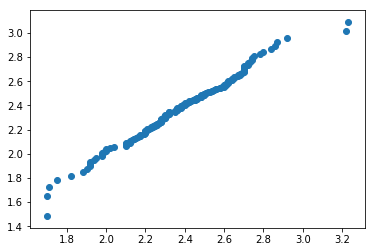

In [4]:
# Посмотрим на QQplot

n = len(data)

sorted_data = numpy.copy(data)
sorted_data.sort()
QQplot = numpy.array([
    (sorted_data[i], stats.logistic.isf(1 - ((i - 0.5) / n), loc=loc, scale=scale))
    for i in range(n)
])
plot.scatter(QQplot[:,0], QQplot[:,1])

In [5]:
# Посмотрим на критерй Андерсона
stats.anderson(data, dist='logistic')

AndersonResult(statistic=0.42040773915101681, critical_values=array([ 0.425,  0.562,  0.659,  0.768,  0.905,  1.009]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

QQplot похож на прямую. На уровне значимости 0.25 отвергуть гитотезу логистичского распределения нельзя по критерию Андерсона нельзя. Гистограмма выглядит похоже. Кучу критерием для нормальности в нашей гипотезе проверить нельзя. Можно считать, что распределение логистическое. Параметры оцениваются с помощью fit.

In [6]:
print("loc={}, scale={}".format(loc, scale))

loc=2.369845464521089, scale=0.15102727076040154
